<a href="https://colab.research.google.com/github/godlygodzilla/nn_and_dl/blob/main/CvD_inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-07-07 07:26:40--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.128, 173.194.213.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   209MB/s    in 0.4s    

2023-07-07 07:26:41 (209 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
weights="/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

pre_trained_model=InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)

pre_trained_model.load_weights(weights)

for layer in pre_trained_model.layers:
  layer.trainable=False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 74, 74, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_282 (Batch  (None, 74, 74, 32)  96          ['conv2d_282[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras import Model

x=keras.layers.Flatten()(last_output)
x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(1024,activation="relu")(x)
x=keras.layers.Dense(1,activation="sigmoid")(x)

model=Model(pre_trained_model.input , x)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 74, 74, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_282 (Batch  (None, 74, 74, 32)  96          ['conv2d_282[0][0]']             
 Normalization)                                                                                   
                                                                                            

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-07-07 07:41:32--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  98.8MB/s    in 0.7s    

2023-07-07 07:41:33 (98.8 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Define our example directories and files
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


train_datagen=ImageDataGenerator(rescale=1.0/255 , rotation_range=40 , width_shift_range=0.2 , height_shift_range=0.2 , shear_range=0.2 , zoom_range=0.2 , horizontal_flip=True , fill_mode="nearest")

train_generator=train_datagen.flow_from_directory(train_dir , batch_size=20 , class_mode="binary",target_size=(150,150))

validation_datagen=ImageDataGenerator(rescale=1.0/255)

validation_generator=validation_datagen.flow_from_directory(validation_dir , class_mode="binary" , batch_size=20 , target_size=(150,150))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history=model.fit(train_generator,
                  steps_per_epoch=100,
                  epochs=20,
                  validation_data=validation_generator,
                  validation_steps=50)

Epoch 1/20
100/100 [==============================] - 253s 2s/step - loss: 0.9483 - accuracy: 0.8580 - val_loss: 0.1452 - val_accuracy: 0.9420
Epoch 2/20
100/100 [==============================] - 194s 2s/step - loss: 0.2449 - accuracy: 0.9040 - val_loss: 0.1541 - val_accuracy: 0.9400
Epoch 3/20
100/100 [==============================] - 195s 2s/step - loss: 0.2105 - accuracy: 0.9215 - val_loss: 0.1067 - val_accuracy: 0.9640
Epoch 4/20
100/100 [==============================] - 232s 2s/step - loss: 0.1888 - accuracy: 0.9280 - val_loss: 0.0945 - val_accuracy: 0.9640
Epoch 5/20
100/100 [==============================] - 196s 2s/step - loss: 0.1798 - accuracy: 0.9335 - val_loss: 0.1399 - val_accuracy: 0.9480
Epoch 6/20
100/100 [==============================] - 233s 2s/step - loss: 0.1755 - accuracy: 0.9275 - val_loss: 0.1652 - val_accuracy: 0.9410
Epoch 7/20
100/100 [==============================] - 233s 2s/step - loss: 0.1605 - accuracy: 0.9355 - val_loss: 0.1228 - val_accuracy: 0.9600

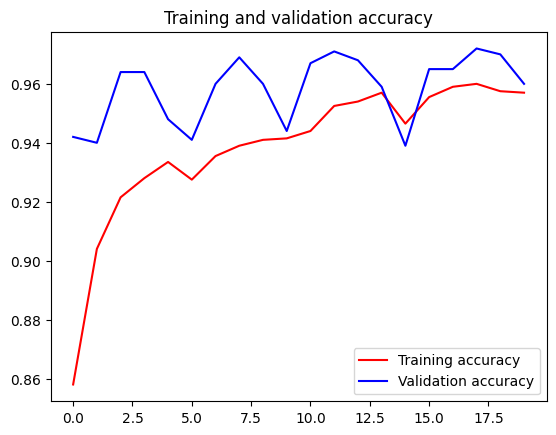

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()